#### Загрузка и подготовка данных для анализа

In [19]:
import machine_learning_datasets as mldatasets
import pandas as pd


# df = mldatasets.load("cardiovascular-disease")
df = pd.read_csv("data/cardio_train.csv", sep=";", index_col="id")
df['age'] = df['age'] / 365.24
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.9 MB


#### Изучение особенностей данных

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.304309,6.755152,29.564122,48.36272,53.945351,58.391742,64.924433
gender,70000.0,1.349571,0.476838,1.000000,1.00000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.00000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.00000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.00000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.00000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.00000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.00000,1.000000,1.000000,3.000000
smoke,70000.0,0.088129,0.283484,0.000000,0.00000,0.000000,0.000000,1.000000
alco,70000.0,0.053771,0.225568,0.000000,0.00000,0.000000,0.000000,1.000000


#### Фильтрация выбросов

In [21]:
df = df[(df['ap_lo'] <= 370) & (df['ap_lo'] > 0)].reset_index(drop=True)
df = df[(df['ap_hi'] <= 370) & (df['ap_hi'] > 0)].reset_index(drop=True)
df = df[df['ap_hi'] >= df['ap_lo']].reset_index(drop=True)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,68711.0,53.291741,6.757626,29.564122,48.343555,53.939875,58.383529,64.924433
gender,68711.0,1.348605,0.476532,1.000000,1.000000,1.000000,2.000000,2.000000
height,68711.0,164.359666,8.191164,55.000000,159.000000,165.000000,170.000000,250.000000
weight,68711.0,74.117921,14.333281,11.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,68711.0,126.669296,16.708332,16.000000,120.000000,120.000000,140.000000,240.000000
ap_lo,68711.0,81.273115,9.572682,1.000000,80.000000,80.000000,90.000000,182.000000
cholesterol,68711.0,1.364643,0.678901,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,68711.0,1.225626,0.571469,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,68711.0,0.087919,0.283179,0.000000,0.000000,0.000000,0.000000,1.000000
alco,68711.0,0.053339,0.224711,0.000000,0.000000,0.000000,0.000000,1.000000


#### Подготовка набора данных для логистической регрессии

In [22]:
from sklearn.model_selection import train_test_split

y = df['cardio']
X = df.drop(['cardio'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

#### Обучение модели логистической регрессии

In [23]:
import statsmodels.api as sm

log_model = sm.Logit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()
log_result.summary2()

Optimization terminated successfully.
         Current function value: 0.561557
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: cardio           Pseudo R-squared: 0.190     
Date:               2025-03-27 13:17 AIC:              65618.3485
No. Observations:   58404            BIC:              65726.0502
Df Model:           11               Log-Likelihood:   -32797.   
Df Residuals:       58392            LL-Null:          -40481.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -11.1730   0.2504 -44.6182 0.0000 -11.6638 -10.6822
age             0.0510   0.0015  34.7971 0.0000   0.0482   0.0539
gender         -0.0227   0.0238  -0.9568 0.3387  -0.0693   0.0238
height         -0.0036   0.0014  -2.6028 0.0092  -0.0063  -0.0009
weight          0.0111   0.0007  14.8567 0.0000   0.0096   0.0125
ap_hi           0.0561   0.0010  56.2824 0.0000   0.0541   0.0580
ap_lo           0.0105   0.0016   6.7670 0.0000   0.0075   0.0136
cholesterol     0.4931   0.0169  29.1612 0.0000   0.4600   0.5262
gluc           -0.1155   0.0192  -6.0138 0.0000  -0.1532  -0.0779
smoke          -0.1306   0.0376  -3.4717 0.0005  -0.2043  -0.0569
alco           -0.2050   0.0457  -4.4907 0.0000  -0.2945  -0.1155
active         -0.2151   0.0237  -9.0574 0.0000  -0.2616  -0.1685
=================================================================

"""

#### Вычисление экспоненты значения для колонки Coef. признаков

In [24]:
import numpy as np

np.exp(log_result.params).sort_values(ascending=False)

cholesterol    1.637374
ap_hi          1.057676
age            1.052357
weight         1.011129
ap_lo          1.010573
height         0.996389
gender         0.977519
gluc           0.890913
smoke          0.877576
alco           0.814627
active         0.806471
const          0.000014
dtype: float64

#### Предсказание результатов для тестового набора

In [25]:
y_pred = log_result.predict(sm.add_constant(X_test)).to_numpy()
y_pred

array([0.40629892, 0.17003609, 0.13405939, ..., 0.95575283, 0.94095239,
       0.91455717])

#### Оценка качества классификации

In [26]:
from sklearn import metrics

y_pred_bin = (y_pred > 0.5).astype(int)
f1 = metrics.f1_score(y_test, y_pred_bin)
f1

0.7087785459878483

#### Результат конкретного случая

In [27]:
y_pred[2872]

0.5746680418975685

#### Исходные данные случая 2872

In [28]:
X_test.iloc[2872]

age             60.521849
gender           1.000000
height         158.000000
weight          62.000000
ap_hi          130.000000
ap_lo           80.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
Name: 46965, dtype: float64

#### Получение данных для определения границы решения

filler_feature_values и filler_feature_ranges определяют диапазоны значений для выборки данных

X_highlight - данные случая № 2872 в виде вектора

In [29]:
filler_feature_values = {
    0: 1,
    1: 30,
    2: 1,
    3: 165,
    4: 57,
    5: 110,
    6: 70,
    7: 1,
    8: 1,
    9: 0,
    10: 0,
    11: 1,
}
filler_feature_ranges = {
    0: 1,
    1: 35,
    2: 2,
    3: 110,
    4: 150,
    5: 140,
    6: 70,
    7: 3,
    8: 3,
    9: 2,
    10: 2,
    11: 2,
}
X_highlight = np.reshape(np.concatenate(([1], X_test.iloc[2872].to_numpy())), (1, 12))
X_highlight

array([[  1.        ,  60.52184865,   1.        , 158.        ,
         62.        , 130.        ,  80.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   1.        ]])

Построение графиков зависимости параметров для определения границы решения

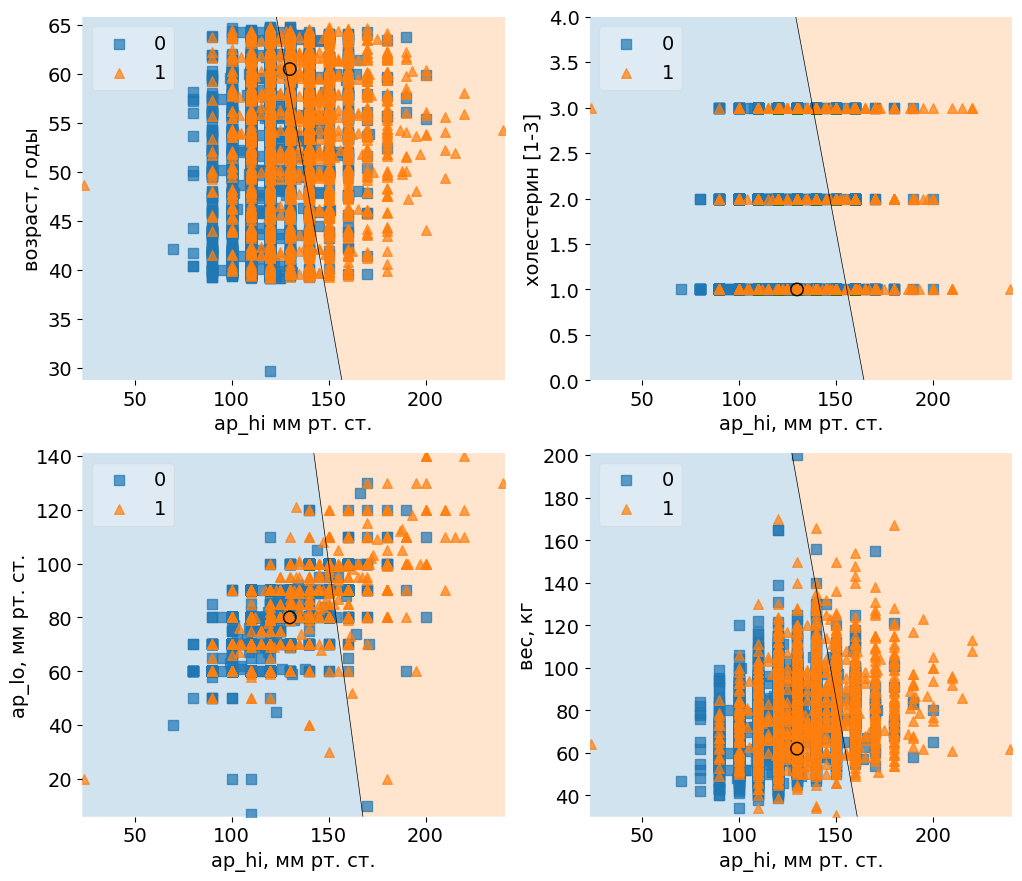

In [30]:
import matplotlib.pyplot as plt


plt.rcParams.update({"font.size": 14})
fig, axarr = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=False)
mldatasets.create_decision_plot(
    X_test,
    y_test,
    log_result, # type: ignore
    [5, 1],
    ["ap_hi мм рт. ст.", "возраст, годы"],
    X_highlight,
    filler_feature_values,
    filler_feature_ranges,
    ax=axarr.flat[0],
)
mldatasets.create_decision_plot(
    X_test,
    y_test,
    log_result, # type: ignore
    [5, 7],
    ["ap_hi, мм рт. ст.", "холестерин [1-3]"],
    X_highlight,
    filler_feature_values,
    filler_feature_ranges,
    ax=axarr.flat[1],
)
mldatasets.create_decision_plot(
    X_test,
    y_test,
    log_result, # type: ignore
    [5, 6],
    ["ap_hi, мм рт. ст.", "ap_lo, мм рт. ст."],
    X_highlight,
    filler_feature_values,
    filler_feature_ranges,
    ax=axarr.flat[2],
)
mldatasets.create_decision_plot(
    X_test,
    y_test,
    log_result, # type: ignore
    [5, 4],
    ["ap_hi, мм рт. ст.", "вес, кг"],
    X_highlight,
    filler_feature_values,
    filler_feature_ranges,
    ax=axarr.flat[3],
)
plt.subplots_adjust(top=1, bottom=0, hspace=0.2, wspace=0.2)
plt.show()

#### Построение графика для определения зависимости между ростом и весом

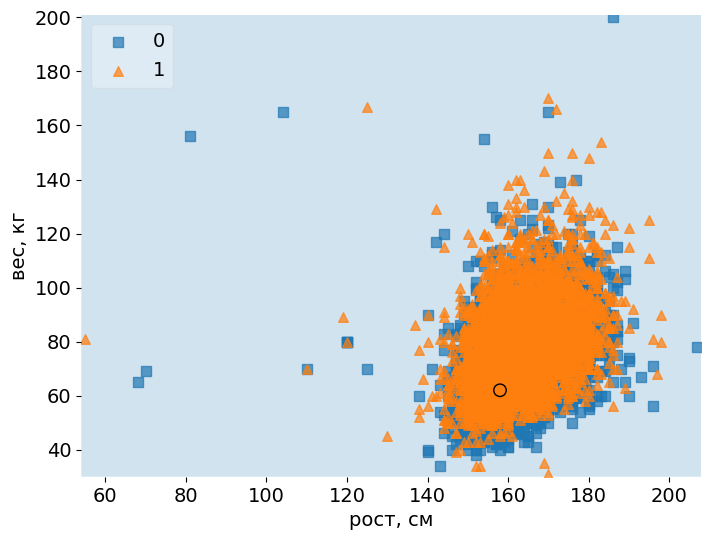

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
mldatasets.create_decision_plot(
    X_test,
    y_test,
    log_result, # type: ignore
    [3, 4],
    ["рост, см", "вес, кг"],
    X_highlight,
    filler_feature_values,
    filler_feature_ranges,
    ax=ax,
)
plt.show()

#### Добавление расчета индекса массы тела

In [32]:
X2 = df.drop(["cardio"], axis=1).copy()
X2["bmi"] = X2["weight"] / (X2["height"] / 100) ** 2
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.15, random_state=9)

#### Визуализация зависимости роста, веса и ИМТ

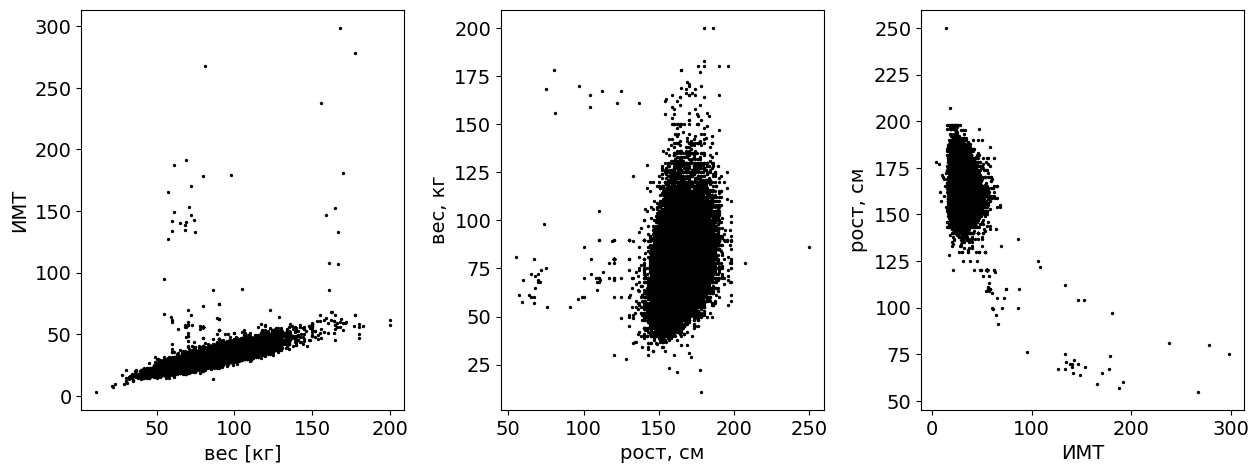

In [33]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
axs[0].scatter(X2["weight"], X2["bmi"], color='black', s=2)
axs[0].set_xlabel('вес [кг]')
axs[0].set_ylabel('ИМТ')
axs[1].scatter(X2["height"], X2["weight"], color='black', s=2)
axs[1].set_xlabel('рост, см')
axs[1].set_ylabel('вес, кг')
axs[2].scatter(X2["bmi"], X2["height"], color='black', s=2)
axs[2].set_xlabel('ИМТ')
axs[2].set_ylabel('рост, см')
plt.subplots_adjust(top = 1, bottom=0, hspace=0.2, wspace=0.3)
plt.show()

#### Обучение новой модели с учетом ИМТ

In [34]:
log_model2 = sm.Logit(y_train, sm.add_constant(X2_train))
log_result2 = log_model2.fit()

Optimization terminated successfully.
         Current function value: 0.561549
         Iterations 6


#### Визуализация зависимости давления ap_hi от ИМТ

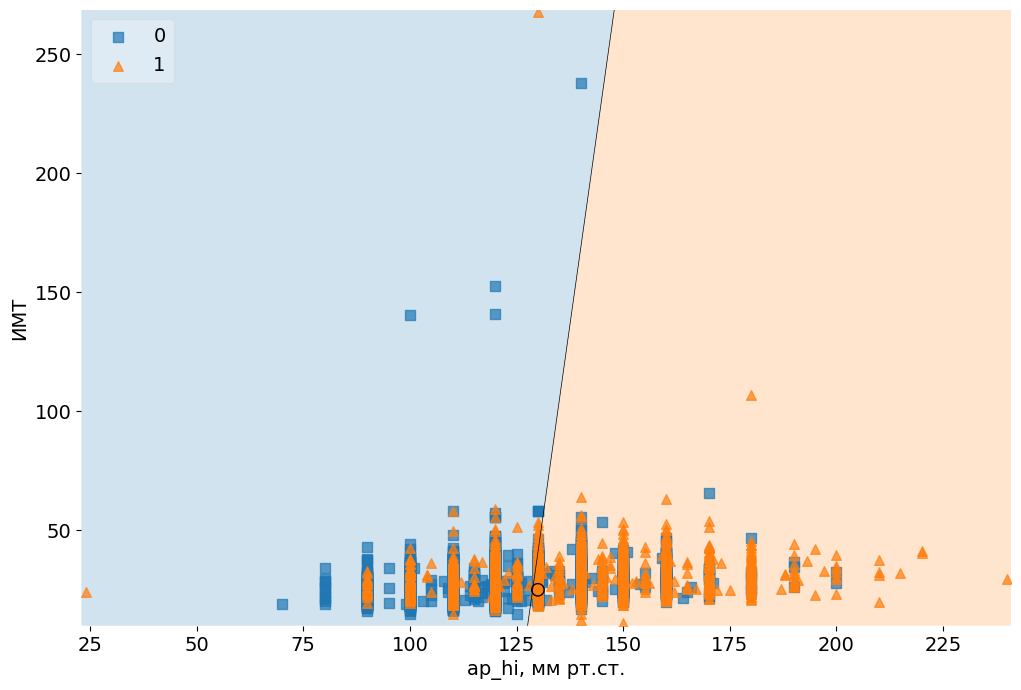

In [35]:
filler_feature_values2 = {
    0: 1,
    1: 60,
    2: 1,
    3: 165,
    4: 57,
    5: 110,
    6: 70,
    7: 1,
    8: 1,
    9: 0,
    10: 0,
    11: 1,
    12: 20,
}
filler_feature_ranges2 = {
    0: 1,
    1: 35,
    2: 2,
    3: 120,
    4: 150,
    5: 140,
    6: 70,
    7: 3,
    8: 3,
    9: 2,
    10: 2,
    11: 2,
    12: 250,
}
X2_highlight = np.reshape(np.concatenate(([1], X2_test.iloc[2872].to_numpy())), (1, 13))
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mldatasets.create_decision_plot(
    X2_test,
    y_test,
    log_result2, # type: ignore
    [5, 12],
    ["ap_hi, мм рт.ст.", "ИМТ"],
    X2_highlight,
    filler_feature_values2,
    filler_feature_ranges2,
    ax=ax,
)
plt.show()